In [8]:
'''
An imputation method based on ranking and nearest neighbor.
    
Beretta L, Santaniello A. Nearest neighbor imputation algorithms: a critical
evaluation. BMC Med Inform Decis Mak. 2016 Jul 25;16 Suppl 3:74.
'''
#Author: Lorenzo Beretta, lorberimm@hotmail.com

#Adapted by L Kahn; 11/20/18

#Dependencies Installation
#pip install rkNN-imputer, pip install sk-rebate

In [2]:
#How it works using a dummy array

import numpy as np
import pandas as pd
from rkNN_imputer.rkNN import rkNN

dummy = np.array ((["0.2", "0.4", "5", "0.4", "6"],
                ["?", "0.4", "8", "0.5", "8"],
                ["0.1", "0.8", "3", "0.2", "6"],
                ["0.3", "0.2", "?", "0.1", "7"],
                ["0.2", "0.9", "3", "0.2", "4"]))

imp = rkNN ()
imp.fit (dummy)
imputed_dummy = imp.transform (dummy)

# show orignal and imputed dataset
print (dummy)
print ("")
print (imputed_dummy)

None
None
[['0.2' '0.4' '5' '0.4' '6']
 ['?' '0.4' '8' '0.5' '8']
 ['0.1' '0.8' '3' '0.2' '6']
 ['0.3' '0.2' '?' '0.1' '7']
 ['0.2' '0.9' '3' '0.2' '4']]

[[0.2 0.4 5.  0.4 6. ]
 [0.1 0.4 8.  0.5 8. ]
 [0.1 0.8 3.  0.2 6. ]
 [0.3 0.2 4.  0.1 7. ]
 [0.2 0.9 3.  0.2 4. ]]


## Research Problem: 

### Can we predict coffee rust amount using temperature, rain, production and futures data from Brasil?

In [2]:
#Now let's try it with real data

#Import Coffee Rust Data

#1578 weekly observations froCoffee-Rustm Brasil from January 1, 1991-July 30, 2018
#Missing 48% of rust data 
#Use kNN imputation to fill in this missing data 

#Data Acquisition described at: https://github.com/thedatalass.
 
import pandas as pd
df = pd.read_csv("brasil_imputed_date.csv")
df.head()

,Date,temp,rain,production,futures,rust
0,12/1/1993,25.7498,208.841,2347.248217,0.7865,0.0
1,12/8/1993,25.7498,208.841,2347.248217,0.7715,0.0
2,12/15/1993,25.7498,208.841,2347.248217,0.7980,0.0
3,12/22/1993,25.7498,208.841,2347.248217,0.7630,0.0
4,12/29/1993,25.7498,208.841,2347.248217,0.7490,0.0


In [2]:
#Delete date column
brasil = df.drop(df.columns[0], axis=1)

In [19]:
#Convert pandas dataframe as numpy array
array = brasil.values
array

array([[25.7498, 208.84099999999998, 2347.25, 0.7865, '0.00'],
       [25.7498, 208.84099999999998, 2347.25, 0.7715, '0.00'],
       [25.7498, 208.84099999999998, 2347.25, 0.7979999999999999, '0.00'],
       ...,
       [24.7691, 6.0, 5000.0, 1.103, '?'],
       [24.7691, 6.0, 5000.0, 1.1165, '?'],
       [24.7691, 6.0, 5000.0, 1.114, '?']], dtype=object)

In [22]:
import numpy as np
from rkNN_imputer.rkNN import rkNN

imp = rkNN ()
imp.fit (array)
imputed_array = imp.transform (array)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [23]:
#Let's look at just the array
imputed_array

array([[2.57498000e+01, 2.08841000e+02, 2.34725000e+03, 7.86500000e-01,
        0.00000000e+00],
       [2.57498000e+01, 2.08841000e+02, 2.34725000e+03, 7.71500000e-01,
        0.00000000e+00],
       [2.57498000e+01, 2.08841000e+02, 2.34725000e+03, 7.98000000e-01,
        0.00000000e+00],
       ...,
       [2.47691000e+01, 6.00000000e+00, 5.00000000e+03, 1.10300000e+00,
        2.56666667e+01],
       [2.47691000e+01, 6.00000000e+00, 5.00000000e+03, 1.11650000e+00,
        2.84057971e+01],
       [2.47691000e+01, 6.00000000e+00, 5.00000000e+03, 1.11400000e+00,
        2.56666667e+01]])

In [24]:
imputed_array.shape

(1584, 5)

In [25]:
#Convert imputed values back to pandas dataframe

#Code adapted from https://www.ritchieng.com/creating-dataframe-from-objects/
# columns
columns_new = ['temp', 'rain','production','futures','rust']

# pass in array and columns
brasil_new = pd.DataFrame(imputed_array, columns=columns_new)
brasil_new.head()

,temp,rain,production,futures,rust
0,25.7498,208.841,2347.25,0.7865,0.0
1,25.7498,208.841,2347.25,0.7715,0.0
2,25.7498,208.841,2347.25,0.7980,0.0
3,25.7498,208.841,2347.25,0.7630,0.0
4,25.7498,208.841,2347.25,0.7490,0.0


In [26]:
#Save imputed dataframe "brasil_new" to CSV
brasil_new.to_csv("brasil_imputed.csv")

Code to combine date from 'df' dataframe with 'brasil_new' dataframe

brasil_new['Date']=df.sum(axis=1)

In [5]:
#But do we need the date for our models???
#Let's try Exploratory Data Analysis without dates first

#CMD - pip install pytz, pip install pandas, pip install matplotlib, pip install numpy
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [6]:
#Basic statistics - Note we added ? values to any rust > 50
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,1578.0,25.534645,0.977400,22.84910,24.771625,25.750150,26.201650,27.3725
rain,1578.0,144.933225,69.701863,6.00000,75.580800,141.984000,206.324000,292.0630
production,1578.0,3384.511281,935.025413,1505.01685,2433.061917,3273.428808,4250.014400,5000.0000
futures,1578.0,1.219080,0.480149,0.42500,0.846500,1.180000,1.438075,3.1480
rust,1578.0,14.749260,12.780107,0.00000,3.000000,13.400000,20.000000,50.0000


Text(0.5,1,'Exploring Coffee Rust, Production and Futures')

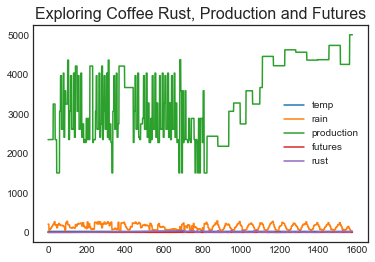

In [9]:
df.plot();
plt.title("Exploring Coffee Rust, Production and Futures", fontsize=16)

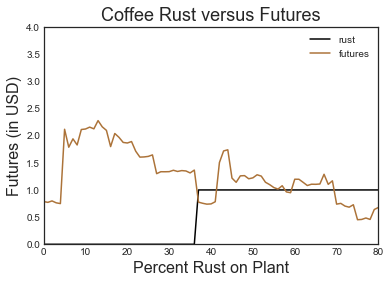

In [10]:
df['rust'].plot(color='black')
df['futures'].plot(color='#ac7339')
#Set x-axis range from 0-50
plt.xlim(0,80)
plt.ylim(0,4)
#Add xaxis label
plt.xlabel("Percent Rust on Plant", fontsize=16)
#Add yaxis label
plt.ylabel("Futures (in USD)", fontsize=16)
plt.title("Coffee Rust versus Futures", fontsize=18)
plt.legend()

Text(0.5,1,'Coffee Rust Histogram')

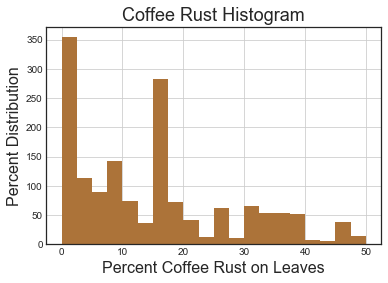

In [12]:
#Histogram of Coffee Rust
df['rust'].hist(bins=20, color='#ac7339')
plt.xlabel("Percent Coffee Rust on Leaves",fontsize=16)
plt.ylabel("Percent Distribution",fontsize=16)
plt.title("Coffee Rust Histogram",fontsize=18)

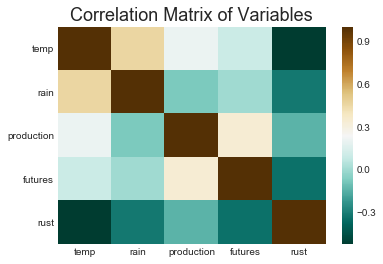

In [13]:
import seaborn as sns
ax = plt.axes()
corr = df.corr()
#The default colors were changed to 'BrBG_r' to match better with the 
#browns in the other visualizations.
sns.heatmap(corr, cmap='BrBG_r',xticklabels=corr.columns.values, yticklabels=corr.columns.values)
#Label title
ax.set_title('Correlation Matrix of Variables',fontsize=18)
plt.show()

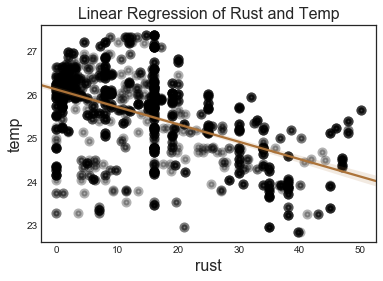

In [14]:
#Next, we could use Seaborn library for regression visualization of Rust versus Production
ax = plt.axes()
ax.set_title('Linear Regression of Rust and Temp',fontsize=16)
ax.set_xlabel('Percent Rust on Plant',fontsize=16)
ax.set_ylabel('Production in 1000-60kg bags',fontsize=16)
sns.regplot(x=df['rust'],color='#ac7339', y=df['temp'],scatter_kws={"color":"black","alpha":0.3,"lw":4} )
plt.show()

In [15]:
#Let's use a pivot table to group the data by Rust percent.
pivot_df = df.pivot_table(index=['rust'])
pivot_df.head()

,futures,production,rain,temp
rust,,,,
0.000000,2.000874,3434.275079,130.456282,25.442776
0.166667,1.816250,4452.367517,112.547000,26.642000
0.333333,1.429000,4730.313617,195.832000,26.397100
0.400000,1.452800,4544.280921,195.832000,26.397100
0.500000,1.425000,4558.173608,169.603000,25.717300


In [16]:
#Let's see error and slope of each variable
import numpy as np
coefficients, residuals, _, _, _ = np.polyfit(range(len(pivot_df.index)),pivot_df,1,full=True)
mse = residuals[0]/(len(pivot_df.index))
nrmse = np.sqrt(mse)/(pivot_df.max() - pivot_df.min())

#Print results
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

Slope [-2.53222495e-03 -3.54488822e+00 -4.98239944e-01 -1.02882023e-02]
NRMSE: futures       0.170021
production    0.000114
rain          0.001459
temp          0.088048
dtype: float64


Now that we've done some EDA, let's try a multiperceptron neural network

In [17]:
#Let's look at the data again
df.tail()

,Date,temp,rain,production,futures,rust
1573,7/2/2018,24.7691,6.0,5000.0,1.1165,28.405797
1574,7/9/2018,24.7691,6.0,5000.0,1.1505,29.809524
1575,7/16/2018,24.7691,6.0,5000.0,1.1030,25.666667
1576,7/23/2018,24.7691,6.0,5000.0,1.1165,28.405797
1577,7/30/2018,24.7691,6.0,5000.0,1.1140,25.666667


In [21]:
#Note in version 0.20 change syntax 'from sklearn.cross_validation import train_test_split' to
#'from sklearn.model_selection import train_test_split'

from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation
import sklearn.metrics as metrics

In [23]:
#Define X, Y variables. 

#OLD CODE
#X = brasil_new.iloc[:, 0:4].values
#y = brasil_new.iloc[:, 4].values

#Delete date column from pandas 'df'
dfnew = df.drop(['Date'], axis=1)
dfnew.head()

,temp,rain,production,futures,rust
0,25.7498,208.841,2347.248217,0.7865,0.0
1,25.7498,208.841,2347.248217,0.7715,0.0
2,25.7498,208.841,2347.248217,0.7980,0.0
3,25.7498,208.841,2347.248217,0.7630,0.0
4,25.7498,208.841,2347.248217,0.7490,0.0


In [24]:
#Define variables 

X = dfnew.drop('rust',axis=1)
y = df['rust']

In [25]:
#Let's split the variables into training and test (test size = 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
# Next we need to do Feature Scaling since we have continuous variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Great Tutorials on implementing NN: https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

In [27]:
#Let's try a Multilayer perceptron (MLPRegressor) Neural Network classifier because why not?

from sklearn.neural_network import MLPRegressor
#Create MLP model with 4 neurons and 4 layers. 
#Chose 4 since that's the number of features.
#Do we need this many neurons for a low mean log loss?

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(4,4,4,4), random_state=1,max_iter=1500)

In [28]:
#Fit training data to model
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 4, 4, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [29]:
predictions = mlp.predict(X_test)

In [30]:
y_true = y_test
y_pred = predictions

In [31]:
#Since this is a regression problem, let's use MSE (mean squared error) for model measurement
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 44:', MSE)

MSE MLP 44: 81.22153710474572


In [33]:
#Now for comparison, create MLP model with 4 neurons and 6 layers. 
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(4,4,4,4,4,4), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 4 neurons, 6 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 46:', MSE)

MSE MLP 46: 77.51324336385208


In [34]:
#Now for comparison, create MLP model with 6 neurons and 4 layers. 
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 4 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 64:', MSE)

MSE MLP 64: 56.77084781732868


In [48]:
#6 neurons & 5 layers
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 relu:', MSE)

MSE MLP 65 relu: 47.699439892111336


In [50]:
#Let's try to tune the hyperparameters

#Change the Solver

#6 neurons & 5 layers
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='sgd', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 relu sgd:', MSE)

MSE MLP 65 relu sgd: 81.84065784319688


In [51]:
#6 neurons & 5 layers
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='adam', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 relu adam:', MSE)

MSE MLP 65 relu adam: 75.9513082189304


In [46]:
#Change the activation function hyperparameter

from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='logistic',solver='lbfgs', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 logistic:', MSE)

MSE MLP 65 logistic: 89.79101625917413


In [47]:
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='tanh',solver='lbfgs', hidden_layer_sizes=(6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 5 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 65 tanh:', MSE)

MSE MLP 65 tanh: 54.40638426464971


In [43]:
#6 neurons & 6 layers
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(6,6,6,6,6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 6 neurons, 6 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 66:', MSE)

MSE MLP 66: 77.34254433245755


In [42]:
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(5,5,5), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 5 neurons, 3 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 53:', MSE)

MSE MLP 53: 60.23538622642504


In [35]:
#Now for comparison, create MLP model with 6 neurons and 2 layers. 
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(6,6), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 4 neurons, 6 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 62:', MSE)

MSE MLP 62: 86.4030203945308


In [36]:
#Now for comparison, create MLP model with 4 neurons and 2 layers. 
from sklearn.neural_network import MLPRegressor

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(4,4), random_state=1,max_iter=1500)

#Fit training data to model
mlp.fit(X_train,y_train)

#Make predictions
predictions = mlp.predict(X_test)

#Set true and predicted target variables
y_true = y_test
y_pred = predictions

#Measure 4 neurons, 6 layer mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP 42:', MSE)

MSE MLP 42: 81.20429642962867


In [52]:
#Let's compare to Logistic Regression as baseline

#DATA PREPROCESSING

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [39]:
#Check the datatype for y_train variable
y_train.dtype

dtype('float64')

In [53]:
from sklearn.linear_model import LogisticRegression

#Fit a Logistic Regression model to the data
logistic = LogisticRegression()
logistic.fit(X_train, encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, logistic.predict(X_test))
print ('MSE Logistic Regression:', MSE)

MSE Logistic Regression: 6619.777601670315


Smaller MSE for Multi-layer perceptron so this is a good starting place on model selection.

In [42]:
#Now let's try a decision tree regressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0)
regressor.fit(X_train,encoded)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [43]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, regressor.predict(X_test))
print('MSE Decision Tree Regressor:', MSE)

MSE Decision Tree Regressor: 6179.33332957746
